# Task 3 – Neural Networks


# Part 1:

# Simple Neural Network

### 1- Import Libraries

In [2]:
# Torch modules:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import transforms

# Data manipulation:
from tqdm import tqdm
import numpy as np

# Metrics:
from sklearn.metrics import confusion_matrix

# Data visualization:
import matplotlib.pyplot as plt

### 2- Import and Load data

In [4]:
# Root File Location of the Data:
file_path = "/Users/alibilal/Library/CloudStorage/OneDrive-Personal/12_MSc. Data Science/04_MachineLearning_and_DeepLearning/Assessment 2/MS4S16 - Coursework Dataset"

# Training Data Location:
load_train = f'{file_path}/train_data.pt'
load_train_labels = f'{file_path}/train_labels.pt'

# Testing Data Location:
load_test = f'{file_path}/test_data.pt'
load_test_labels = f'{file_path}/test_labels.pt'

# Load Training and Testing Data:
train_images = torch.load(load_train)
test_images = torch.load(load_test)
train_labels = torch.load(load_train_labels)
test_labels = torch.load(load_test_labels)

# Print the size of the data:
print(train_images.shape, test_images.shape)

torch.Size([5121, 3, 208, 176]) torch.Size([1279, 3, 208, 176])


### 3- Exploratory Data Analysis

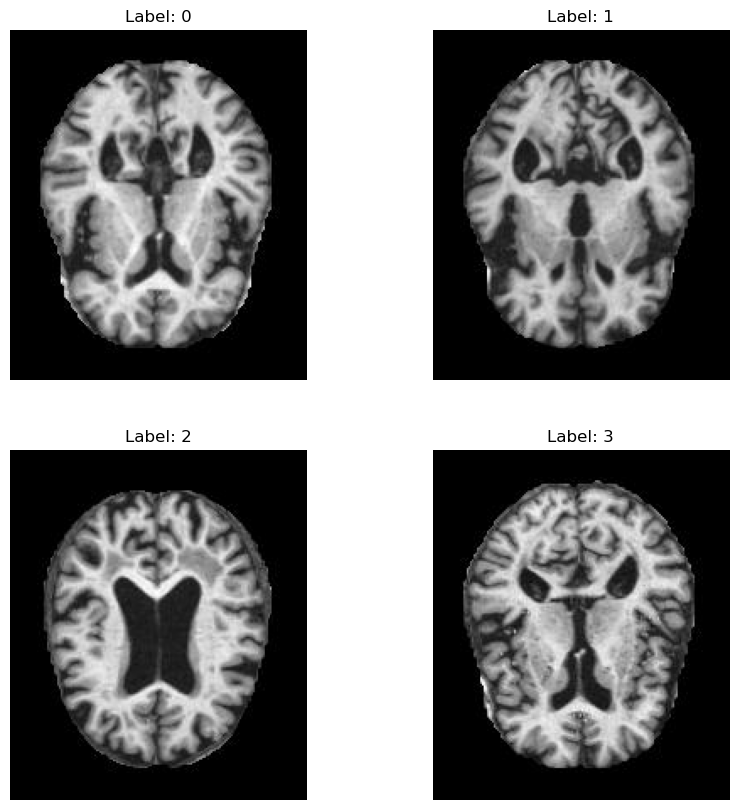

In [5]:
# Visualize one sample image for each label in greyscale:

# Create a dictionary to store one sample image for each label
unique_labels = torch.unique(train_labels)
samples_per_label = {}

# Find one sample image for each label
for label in unique_labels:
    idx = (train_labels == label).nonzero(as_tuple=False)[0]  # Find the index of the first occurrence of the label
    sample_image = train_images[idx].squeeze(0)  # Remove the batch dimension
    samples_per_label[label.item()] = sample_image

# Visualize one sample image for each label
plt.figure(figsize=(10, 10))
for i, (label, image) in enumerate(samples_per_label.items()):
    plt.subplot(2, 2, i + 1)
    plt.imshow(image.permute(1, 2, 0).cpu().numpy())  # Transpose dimensions for visualization and convert to numpy array
    plt.title(f"Label: {label}")
    plt.axis('off')
plt.show()

In [6]:
# Check the record count for each label:
unique_labels, label_counts = torch.unique(train_labels, return_counts=True)

# Print the number of records for each label
for label, count in zip(unique_labels, label_counts):
    print(f"Label {label.item()}: {count.item()} records")


Label 0: 717 records
Label 1: 52 records
Label 2: 2560 records
Label 3: 1792 records


### 4- Flatten the data

In [7]:
n_dimensions = 1
myfunc = nn.Flatten(n_dimensions)

train_images = myfunc(train_images)
test_images = myfunc(test_images)
print(f"The Shape of datasets after using the Flatten Function is:\n Train Images:{train_images.shape} Test Images:{test_images.shape}")

print(f'The types of datasets are:\n Train Labels:{train_labels.type()}Test Labels:{test_labels.type()}')

The Shape of datasets after using the Flatten Function is:
 Train Images:torch.Size([5121, 109824]) Test Images:torch.Size([1279, 109824])
The types of datasets are:
 Train Labels:torch.LongTensorTest Labels:torch.LongTensor


### 5- Create Simple Neural Network

In [8]:
class SimpleNeuralNetwork(nn.Module):
    """
    Simple Neural network (without torch) having 4 layers with ReLU activation functions and a log softmax output layer.
    """
    def __init__(self, n_features):
        super(SimpleNeuralNetwork, self).__init__()
        self.fc1 = nn.Linear(n_features, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 32)
        self.fc4 = nn.Linear(32, 4) #Since the dataset has 4 classes

    def forward(self, x):
        """
        Forward pass of the neural network.
        """
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.log_softmax(self.fc4(x), dim=1)

        return x

In [9]:
# Create an instance of the "SimpleNeuralNetwork" class
model = SimpleNeuralNetwork(n_features=109824)
print(model)

SimpleNeuralNetwork(
  (fc1): Linear(in_features=109824, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=32, bias=True)
  (fc4): Linear(in_features=32, out_features=4, bias=True)
)


In [10]:
train_images.shape, train_labels.shape

(torch.Size([5121, 109824]), torch.Size([5121]))

### 6- Train Simple Neural Network Model

In [11]:
def train(model, images, labels, no_iterations=25, batch_size=100):
    """
    Trains the given model using the provided images and labels.
    Parameters:
    - model (torch.nn.Module): The model to be trained.
    - images (torch.Tensor): The input images for training.
    - labels (torch.Tensor): The corresponding labels for the images.
    - no_iterations (int): The number of training iterations. (Default: 25)
    - batch_size (int): The batch size for training. (Default: 100)
    """
    loss_function = nn.CrossEntropyLoss()
    optimizer = torch.optim.SGD(model.parameters(), lr=0.01)
    
    # Training Loop:
    for i in range(no_iterations):
        for i in tqdm(range(0, len(images), batch_size)):
            # Batch the Data:
            batch_data = images[i:i+batch_size]
            batch_labels = labels[i:i+batch_size]

            # 1) Calculate the Output of Model:
            y_predicted = model.forward(batch_data)

            # 2) Calculate the Error:
            loss = loss_function(y_predicted, batch_labels)

            # 3) Calculate the Gradients:
            model.zero_grad()  # Reset Gradients
            loss.backward()  # Calculate the Gradients

            # 4) Update the Gradients:
            optimizer.step()

        print(f"Iteration {i} | Loss: {loss}")

In [12]:
# Train the Model:
train(model, train_images, train_labels)

100%|██████████| 52/52 [00:01<00:00, 42.38it/s]


Iteration 5100 | Loss: 0.9319109320640564


100%|██████████| 52/52 [00:00<00:00, 59.16it/s]


Iteration 5100 | Loss: 0.9461205005645752


100%|██████████| 52/52 [00:00<00:00, 58.08it/s]


Iteration 5100 | Loss: 0.9403647184371948


100%|██████████| 52/52 [00:00<00:00, 60.24it/s]


Iteration 5100 | Loss: 0.9237753748893738


100%|██████████| 52/52 [00:00<00:00, 60.13it/s]


Iteration 5100 | Loss: 0.8975977301597595


100%|██████████| 52/52 [00:00<00:00, 60.03it/s]


Iteration 5100 | Loss: 0.8643239140510559


100%|██████████| 52/52 [00:00<00:00, 59.75it/s]


Iteration 5100 | Loss: 0.8364397883415222


100%|██████████| 52/52 [00:00<00:00, 59.51it/s]


Iteration 5100 | Loss: 0.8266903162002563


100%|██████████| 52/52 [00:00<00:00, 60.03it/s]


Iteration 5100 | Loss: 0.8234840631484985


100%|██████████| 52/52 [00:00<00:00, 60.04it/s]


Iteration 5100 | Loss: 0.8176440000534058


100%|██████████| 52/52 [00:00<00:00, 60.12it/s]


Iteration 5100 | Loss: 0.8130689263343811


100%|██████████| 52/52 [00:00<00:00, 58.96it/s]


Iteration 5100 | Loss: 0.8072779774665833


100%|██████████| 52/52 [00:00<00:00, 60.07it/s]


Iteration 5100 | Loss: 0.8004999756813049


100%|██████████| 52/52 [00:00<00:00, 59.99it/s]


Iteration 5100 | Loss: 0.7927683591842651


100%|██████████| 52/52 [00:00<00:00, 59.95it/s]


Iteration 5100 | Loss: 0.7800482511520386


100%|██████████| 52/52 [00:00<00:00, 59.07it/s]


Iteration 5100 | Loss: 0.7756286859512329


100%|██████████| 52/52 [00:00<00:00, 60.12it/s]


Iteration 5100 | Loss: 0.758599579334259


100%|██████████| 52/52 [00:00<00:00, 60.04it/s]


Iteration 5100 | Loss: 0.7792754173278809


100%|██████████| 52/52 [00:00<00:00, 60.06it/s]


Iteration 5100 | Loss: 0.7298284769058228


100%|██████████| 52/52 [00:00<00:00, 59.89it/s]


Iteration 5100 | Loss: 0.7155267000198364


100%|██████████| 52/52 [00:00<00:00, 60.25it/s]


Iteration 5100 | Loss: 0.7001721858978271


100%|██████████| 52/52 [00:00<00:00, 60.09it/s]


Iteration 5100 | Loss: 0.6932954788208008


100%|██████████| 52/52 [00:00<00:00, 60.04it/s]


Iteration 5100 | Loss: 0.6787539720535278


100%|██████████| 52/52 [00:00<00:00, 58.92it/s]


Iteration 5100 | Loss: 0.6660480499267578


100%|██████████| 52/52 [00:00<00:00, 60.01it/s]

Iteration 5100 | Loss: 0.6492249965667725


### 7- Test Function

In [13]:
def test(model, images, labels):
    """
    Tests the given model using the provided images and labels.
    Parameters:
    - model: The model to be tested. (Type: torch.nn.Module)
    - images: The input images for testing. (Type: torch.Tensor)
    - labels: The corresponding labels for the images. (Type: torch.Tensor)
    Returns:
    - The predicted labels for the images. (Type: torch.Tensor)
    """
    # Predict the Output:
    with torch.no_grad():
        y_predicted = model.forward(images)

    print(f"Data Examples: {y_predicted[0]}\n Data label:{labels[0]}")

    # Predicted Classes:
    predicted_classes = torch.argmax(y_predicted, dim = 1)
    print(f'Predicted Classes:\n {predicted_classes[0:5]}\nActual Classes:\n {labels[0:5]}')

    # Accuracy:
    correct = 0
    total = 0
    for i in range(len(predicted_classes)):
        if predicted_classes[i] == labels[i]:
            correct += 1
        total += 1
    print(f"Accuracy: {round(correct/total, 4)}")

    # Confusion Matrix:
    conf_matrix = confusion_matrix(labels, predicted_classes)
    print(f'Confusion Matrix:\n{conf_matrix}')

In [14]:
# Test the Model:
test(model, test_images, test_labels)

Data Examples: tensor([-5.2887, -6.9643, -0.1302, -2.1534])
 Data label:3
Predicted Classes:
 tensor([2, 2, 2, 3, 2])
Actual Classes:
 tensor([3, 2, 2, 0, 0])
Accuracy: 0.5262
Confusion Matrix:
[[  0   0 153  26]
 [  0   0  11   1]
 [  0   0 637   3]
 [  0   0 412  36]]


# Improved Simple Neural Network

### 1- Create Imporved Neural Network Model

In [17]:
# Recheck the record shape:
print(f"The Shape of datasets after using the Flatten Function is:\n Train Images:{train_images.shape} Test Images:{test_images.shape}")
print(f'The types of datasets are:\n Train Labels:{train_labels.type()}Test Labels:{test_labels.type()}')

The Shape of datasets after using the Flatten Function is:
 Train Images:torch.Size([5121, 109824]) Test Images:torch.Size([1279, 109824])
The types of datasets are:
 Train Labels:torch.LongTensorTest Labels:torch.LongTensor


In [18]:
class SimpleImprovedNeuralNetwork(nn.Module):
    """
    Simple Neural network (without torch) having layers with ReLU activation functions and a log softmax output layer.
    """
    def __init__(self, n_features, l2_lambda=0.01):
        super(SimpleImprovedNeuralNetwork, self).__init__()
        self.fc1 = nn.Linear(n_features, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 64)
        self.fc4 = nn.Linear(64, 32)
        self.fc5 = nn.Linear(32, 4) #Since the dataset has 4 classes
        self.l2_lambda = l2_lambda
        
    def forward(self, x):
        """
        Forward pass of the neural network.
        """
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.relu(self.fc4(x))
        x = F.log_softmax(self.fc5(x), dim=1)

        return x
    
    def l2_regularization_loss(self):
        """
        Calculates the L2 regularization loss for the model.
        """
        l2_loss = 0.0
        for param in self.parameters():
            l2_loss += torch.norm(param, 2)**2
        return self.l2_lambda * l2_loss

In [19]:
# Create an instance of the "SimpleNeuralNetwork" class
model = SimpleImprovedNeuralNetwork(n_features=109824)
print(model)

SimpleImprovedNeuralNetwork(
  (fc1): Linear(in_features=109824, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=128, bias=True)
  (fc3): Linear(in_features=128, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=32, bias=True)
  (fc5): Linear(in_features=32, out_features=4, bias=True)
)


### 4- Train the model

In [20]:
def train(model, images, labels, no_iterations, batch_size):
    """
    Trains the given model using the provided images and labels.

    Parameters:
    - model: The model to be trained. (Type: torch.nn.Module)
    - images: The input images for training. (Type: torch.Tensor)
    - labels: The corresponding labels for the images. (Type: torch.Tensor)
    - no_iterations: The number of training iterations.
    - batch_size: The batch size for training.
    """
    loss_function = nn.CrossEntropyLoss()
    optimizer = torch.optim.SGD(model.parameters(), lr=0.01)
    
    # Training Loop:
    for i in range(no_iterations):
        for i in tqdm(range(0, len(images), batch_size)):
            # Batch the Data:
            batch_data = images[i:i+batch_size]
            batch_labels = labels[i:i+batch_size]

            # 1) Calculate the Output of Model:
            y_predicted = model.forward(batch_data)

            # 2) Calculate the Error:
            loss = loss_function(y_predicted, batch_labels)

            # 3) Calculate the Gradients:
            model.zero_grad()  # Reset Gradients
            loss.backward()  # Calculate the Gradients

            # 4) Update the Gradients:
            optimizer.step()

        print(f"Iteration {i} | Loss: {loss}")

In [22]:
# Train the Model:
train(model, train_images, train_labels, no_iterations=50, batch_size=150)

100%|██████████| 35/35 [00:01<00:00, 26.74it/s]


Iteration 5100 | Loss: 0.85176020860672


100%|██████████| 35/35 [00:01<00:00, 29.23it/s]


Iteration 5100 | Loss: 0.8487011194229126


100%|██████████| 35/35 [00:01<00:00, 28.89it/s]


Iteration 5100 | Loss: 0.8431545495986938


100%|██████████| 35/35 [00:01<00:00, 28.96it/s]


Iteration 5100 | Loss: 0.839328408241272


100%|██████████| 35/35 [00:01<00:00, 28.16it/s]


Iteration 5100 | Loss: 0.8333060145378113


100%|██████████| 35/35 [00:01<00:00, 28.15it/s]


Iteration 5100 | Loss: 0.8323646783828735


100%|██████████| 35/35 [00:01<00:00, 28.34it/s]


Iteration 5100 | Loss: 0.828598141670227


100%|██████████| 35/35 [00:01<00:00, 28.38it/s]


Iteration 5100 | Loss: 0.82569420337677


100%|██████████| 35/35 [00:01<00:00, 28.51it/s]


Iteration 5100 | Loss: 0.8234903216362


100%|██████████| 35/35 [00:01<00:00, 28.76it/s]


Iteration 5100 | Loss: 0.8179291486740112


100%|██████████| 35/35 [00:01<00:00, 29.05it/s]


Iteration 5100 | Loss: 0.8140442967414856


100%|██████████| 35/35 [00:01<00:00, 28.81it/s]


Iteration 5100 | Loss: 0.8072832822799683


100%|██████████| 35/35 [00:01<00:00, 28.58it/s]


Iteration 5100 | Loss: 0.8028573393821716


100%|██████████| 35/35 [00:01<00:00, 28.90it/s]


Iteration 5100 | Loss: 0.7965497374534607


100%|██████████| 35/35 [00:01<00:00, 28.91it/s]


Iteration 5100 | Loss: 0.7873623371124268


100%|██████████| 35/35 [00:01<00:00, 28.64it/s]


Iteration 5100 | Loss: 0.7802112102508545


100%|██████████| 35/35 [00:01<00:00, 29.16it/s]


Iteration 5100 | Loss: 0.7727817296981812


100%|██████████| 35/35 [00:01<00:00, 29.20it/s]


Iteration 5100 | Loss: 0.7623866200447083


100%|██████████| 35/35 [00:01<00:00, 28.97it/s]


Iteration 5100 | Loss: 0.7509278059005737


100%|██████████| 35/35 [00:01<00:00, 29.12it/s]


Iteration 5100 | Loss: 0.7383654713630676


100%|██████████| 35/35 [00:01<00:00, 29.20it/s]


Iteration 5100 | Loss: 0.7271230816841125


100%|██████████| 35/35 [00:01<00:00, 28.99it/s]


Iteration 5100 | Loss: 0.7087528109550476


100%|██████████| 35/35 [00:01<00:00, 29.18it/s]


Iteration 5100 | Loss: 0.6969903111457825


100%|██████████| 35/35 [00:01<00:00, 29.19it/s]


Iteration 5100 | Loss: 0.6896346807479858


100%|██████████| 35/35 [00:01<00:00, 28.87it/s]


Iteration 5100 | Loss: 0.7166159749031067


100%|██████████| 35/35 [00:01<00:00, 29.19it/s]


Iteration 5100 | Loss: 0.6624885201454163


100%|██████████| 35/35 [00:01<00:00, 29.25it/s]


Iteration 5100 | Loss: 0.6432952284812927


100%|██████████| 35/35 [00:01<00:00, 29.12it/s]


Iteration 5100 | Loss: 0.6570565104484558


100%|██████████| 35/35 [00:01<00:00, 28.63it/s]


Iteration 5100 | Loss: 0.6640772819519043


100%|██████████| 35/35 [00:01<00:00, 28.56it/s]


Iteration 5100 | Loss: 0.6389405131340027


100%|██████████| 35/35 [00:01<00:00, 29.02it/s]


Iteration 5100 | Loss: 0.6164243221282959


100%|██████████| 35/35 [00:01<00:00, 28.94it/s]


Iteration 5100 | Loss: 0.6279531121253967


100%|██████████| 35/35 [00:01<00:00, 29.12it/s]


Iteration 5100 | Loss: 0.6618438363075256


100%|██████████| 35/35 [00:01<00:00, 28.56it/s]


Iteration 5100 | Loss: 0.6093197464942932


100%|██████████| 35/35 [00:01<00:00, 29.12it/s]


Iteration 5100 | Loss: 0.5818010568618774


100%|██████████| 35/35 [00:01<00:00, 28.87it/s]


Iteration 5100 | Loss: 0.5309067964553833


100%|██████████| 35/35 [00:01<00:00, 29.11it/s]


Iteration 5100 | Loss: 0.5599082708358765


100%|██████████| 35/35 [00:01<00:00, 29.05it/s]


Iteration 5100 | Loss: 0.6836121678352356


100%|██████████| 35/35 [00:01<00:00, 28.95it/s]


Iteration 5100 | Loss: 0.5317801833152771


100%|██████████| 35/35 [00:01<00:00, 29.14it/s]


Iteration 5100 | Loss: 0.5139729380607605


100%|██████████| 35/35 [00:01<00:00, 29.12it/s]


Iteration 5100 | Loss: 0.48785120248794556


100%|██████████| 35/35 [00:01<00:00, 28.90it/s]


Iteration 5100 | Loss: 0.5943365693092346


100%|██████████| 35/35 [00:01<00:00, 28.50it/s]


Iteration 5100 | Loss: 0.46815845370292664


100%|██████████| 35/35 [00:01<00:00, 28.55it/s]


Iteration 5100 | Loss: 0.45501500368118286


100%|██████████| 35/35 [00:01<00:00, 28.69it/s]


Iteration 5100 | Loss: 0.5424941182136536


100%|██████████| 35/35 [00:01<00:00, 28.85it/s]


Iteration 5100 | Loss: 0.5584040880203247


100%|██████████| 35/35 [00:01<00:00, 29.05it/s]


Iteration 5100 | Loss: 0.4962080121040344


100%|██████████| 35/35 [00:01<00:00, 28.93it/s]


Iteration 5100 | Loss: 0.47301965951919556


100%|██████████| 35/35 [00:01<00:00, 28.75it/s]


Iteration 5100 | Loss: 0.5165098905563354


100%|██████████| 35/35 [00:01<00:00, 28.46it/s]

Iteration 5100 | Loss: 0.42595258355140686


### 5- Test the model

In [23]:
def test(model, images, labels):
    """
    Tests the given model using the provided images and labels.
    Parameters:
    - model: The model to be tested. (Type: torch.nn.Module)
    - images: The input images for testing. (Type: torch.Tensor)
    - labels: The corresponding labels for the images. (Type: torch.Tensor)
    Returns:
    - The predicted labels for the images. (Type: torch.Tensor)
    """
    # Predict the Output:
    with torch.no_grad():
        y_predicted = model.forward(images)

    print(f"Data Examples: {y_predicted[0]}\n Data label:{labels[0]}")

    # Predicted Classes:
    predicted_classes = torch.argmax(y_predicted, dim = 1)
    print(f'Predicted Classes:\n {predicted_classes[0:5]}\nActual Classes:\n {labels[0:5]}')


    # Accuracy:
    correct = 0
    total = 0
    for i in range(len(predicted_classes)):
        if predicted_classes[i] == labels[i]:
            correct += 1
        total += 1
    print(f"Accuracy: {round(correct/total, 4)}")

    # Confusion Matrix:
    conf_matrix = confusion_matrix(labels, predicted_classes)
    print(f'Confusion Matrix:\n{conf_matrix}')

In [24]:
# Test the Model:
test(model, test_images, test_labels)

Data Examples: tensor([-6.3168, -9.5928, -0.1319, -2.1066])
 Data label:3
Predicted Classes:
 tensor([2, 2, 2, 3, 2])
Actual Classes:
 tensor([3, 2, 2, 0, 0])
Accuracy: 0.5536
Confusion Matrix:
[[  0   0 104  75]
 [  0   0   6   6]
 [  0   0 590  50]
 [  0   0 330 118]]


# Report on Simple Neural Network

## Introduction:
This work consists of two neural network models. One is a Simple Neural Network model and the other is the improved version. Both of the models are created without using the torch. The model was trained and evaluated on a dataset containing MRI scans.

## Input dataset:
The input dataset consists of MRI images obtained from patients diagnosed with Alzheimer's disease. The dataset has 6400 images which are divided into training (80%) and testing sets (20%).

 Each image has red, green, and blue colour channels. This indicates that the images are in RGB format, with the height of each image being 208 pixels and the width of each image being 176 pixels.

The dataset is labelled with four classes, each providing information about the severity of dementia in the patients whose MRI scans are included in the dataset.

- Class 0: Mild Demented
- Class 1: Moderate Demented
- Class 2: NonDemented
- Class 3: Very Mild Demented

Overall, the dataset contains a diverse set of MRI images representing different stages of dementia, which makes it suitable for training and evaluating machine learning models aimed at diagnosing Alzheimer's disease based on MRI scans.

## Methodology:
### - Simple Basic Neural Network:
 The model architecture consisted of 4 fully connected layers (Linear layers) with rectified linear unit (ReLU) activation functions applied after each layer. The final layer is a softmax output layer.

The input layer of the neural network has a size corresponding to the flattened dimensions of the input images (109824), and the output layer has four neurons, corresponding to the four classes of Alzheimer's disease progression.

The learning rate is 0.010, the batch size is 100, and the number of iterations is 25.

### Improved Basic Neural Network:
To improve the performance of the model, the following parameter tunings were made:
The number of linear layers was increased to 5, along with the number of neurons to 256, whereas rectified linear unit (ReLU) activation functions were applied after each layer.
L2 regularization was applied to the network's weights to prevent overfitting. The regularization strength was set to 0.01.
The Iterations were increased from 50 to 100 and the batch size was increased from 100 to 150.

All other parameters were the same as the Simple Basic Neural Network Model.

### Evaluation Matrices:
The accuracy and confusion matrix techniques are used to evaluate and compare the performance of both models.

### Hyperparameters testing:
The following hypermeters were also tested to improve the results of the improved model:
#### 1st Improvement:
- 4 linear layers with 256 neurons, rest of the parameters were the same as Simple Neural Network Model
- Results:
Accuracy: 0.5465
Confusion Matrix:
[[  0   0 132  47]
 [  0   0   9   3]
 [  0   0 623  17]
 [  0   0 372  76]]

#### 2nd Improvement:
- 5 linear layers with 256 neurons, rest of the parameters were the same as Simple Neural Network Model
- Results:
Accuracy: 0.5371
Confusion Matrix:
[[  0   0 105  74]
 [  0   0   8   4]
 [  0   0 587  53]
 [  0   0 348 100]]

#### 3rd Improvement:
- All parameters were kept the same as the 2nd Improvement and additionally, L2 Regularisation was performed with the strength of 0.01.
- Results:
Accuracy: 0.5442
Confusion Matrix:
[[  0   0 115  64]
 [  0   0   8   4]
 [  0   0 612  28]
 [  0   0 364  84]]

#### Final Parameter Hypertuning:
- The Iterations were increased from 50 to 100 and the batch size was increased from 100 to 150. All other parameters were the same as the 3rd Improved Model.
- Results:
Accuracy: 0.5536
Confusion Matrix:
[[  0   0 104  75]
 [  0   0   6   6]
 [  0   0 590  50]
 [  0   0 330 118]]

## Output Discussion:
The accuracy of the Simple Basic Neural Network is 0.5262, the loss is 0.6492. Whereas, the accuracy of the Improved Simple Neural Network is 0.5536, and the loss is 0.4259. The higher accuracy of the Improved Simple Neural Network indicates its superior ability to correctly classify instances compared to the Simple Basic Neural Network, while the lower loss suggests that the Improved Model's predictions are closer to the actual target values during training, reflecting improved efficiency and predictive accuracy.

The confusion matrix shows improved results of the improved model. For Class 0, 2 and 3, the improved model exhibits a significant improvement, with fewer misclassifications compared to the simple model. However, both models struggle to predict Class 1 accurately, with only a few correct predictions.

Overall, the model shows some capability to classify, but there is room for improvement, especially in accurately predicting class 1 and reducing misclassifications for other classes.

# Basic Convolutional Neural Network

#### 1- Import and Load data

In [3]:
file_path = "/Users/alibilal/Library/CloudStorage/OneDrive-Personal/12_MSc. Data Science/04_MachineLearning_and_DeepLearning/Assessment 2/MS4S16 - Coursework Dataset"

# Training Data Location:
load_train = f'{file_path}/train_data.pt'
load_train_labels = f'{file_path}/train_labels.pt'

# Testing Data Location:
load_test = f'{file_path}/test_data.pt'
load_test_labels = f'{file_path}/test_labels.pt'

# Load Training and Testing Data:
train_images = torch.load(load_train)
test_images = torch.load(load_test)
train_labels = torch.load(load_train_labels)
test_labels = torch.load(load_test_labels)

# Check the size of the data:
print(train_images.shape, test_images.shape)

torch.Size([5121, 3, 208, 176]) torch.Size([1279, 3, 208, 176])


#### 2- Convolutional Neural Network - Step 1

In [4]:
class Conv_NN01(nn.Module):
    """
    Convolutional Neural Network with 3 Convolutional Layers and 1 Max Pooling Layer.
    """
    def __init__(self, n_channels):
        super().__init__()
        
        # Convolutional Layers & Max Pooling Layer Defined:
        self.conv1 = nn.Conv2d(in_channels = n_channels, out_channels = 8, kernel_size = (5,5))
        self.conv2 = nn.Conv2d(in_channels = 8, out_channels = 16,  kernel_size = (5,5))
        self.conv3 = nn.Conv2d(in_channels = 16, out_channels = 32,  kernel_size = (5,5))
        self.pool = nn.MaxPool2d((2,2))
    
        # Flatten Data: Cannot yet be defined
        # Linear Layers: Cannot yet be defined
        
    def forward(self, x):
        """
        Forward pass of the neural network.
        """
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))

        print(f"Step 1: Shape of Data before Flattening: {x.shape}")
        return x

# Create an instance of the class
model  = Conv_NN01(n_channels = 3)

# Forward Pass:
n_samples = 10
result = model.forward(train_images[0:n_samples])

Step 1: Shape of Data before Flattening: torch.Size([10, 32, 22, 18])


#### 3- Convolutional Neural Network - Step 2

In [5]:
class Basic_MRI_CNN(nn.Module):
    """
    Convolutional Neural Network for MRI Image Classification.
    """
    def __init__(self, n_channels):
        """
        Initialize the Convolutional Neural Network.
        Parameters: n_channels: The number of channels in the input images. (Type: int)
        """
        super().__init__()
        
        # Convolutional Layers & Max Pooling Layer Defined:
        self.conv1 = nn.Conv2d(in_channels = n_channels, out_channels = 8, kernel_size = (5,5))
        self.conv2 = nn.Conv2d(in_channels = 8, out_channels = 16,  kernel_size = (5,5))
        self.conv3 = nn.Conv2d(in_channels = 16, out_channels = 32,  kernel_size = (5,5))
        self.pool = nn.MaxPool2d((2,2))
        
        # Flatten Data into one dimension:
        self.flatten = nn.Flatten(1)
        
        # Linear Layers:
        self.fc1 = nn.Linear(32*22*18, 128) # 32*22*18 is the output of the Flatten Layer
        self.fc2 = nn.Linear(128, 4) # 4 is the number of classes
        
    def forward(self, x):
        """
        Forward Pass of the Neural Network.
        Args: x (torch.Tensor): The input data.
        Returns: torch.Tensor: The output of the Neural Network.
        """
        # Step 1: Convolutional Layers
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))

        # Step 2: Flatten Data & Linear Layers
        x = self.flatten(x)

        x = F.relu(self.fc1(x))
        x = F.log_softmax(self.fc2(x), dim=1)

        return x

#### 4- Loss and Optimizer

In [6]:
# Initialize the CNN Model:
model  = Basic_MRI_CNN(n_channels = 3)

# Define optimizer and loss function
loss_function = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

#### 5- Training Loop

In [7]:
# Train the Model:
epochs = 5
batch_size = 100
for epoch in range (epochs):
    for i in tqdm(range(0,len(train_images), batch_size)):
        # Batch Our Data:
        batch_data = train_images[i:i+batch_size]
        batch_labels = train_labels[i:i+batch_size]
        # Calculate Output:
        model.zero_grad()  
        output = model(batch_data)  
        # Calculate & Update Gradients:
        loss = loss_function(output, batch_labels) 
        loss.backward()  
        optimizer.step()  
    print(loss)

100%|██████████| 52/52 [00:38<00:00,  1.36it/s]


tensor(0.9349, grad_fn=<NllLossBackward0>)


100%|██████████| 52/52 [00:38<00:00,  1.35it/s]


tensor(0.9439, grad_fn=<NllLossBackward0>)


100%|██████████| 52/52 [00:38<00:00,  1.35it/s]


tensor(0.9413, grad_fn=<NllLossBackward0>)


100%|██████████| 52/52 [00:38<00:00,  1.36it/s]


tensor(0.9334, grad_fn=<NllLossBackward0>)


100%|██████████| 52/52 [00:38<00:00,  1.36it/s]

tensor(0.9087, grad_fn=<NllLossBackward0>)


#### 6- Testing Loop

In [8]:
# Run the model of GPU if available:
if torch.cuda.is_available():
    device = torch.device("cuda:0")
    print("Running on CUDA")
else:
    device = torch.device("cpu")
    print("Running on CPU")

# Move the model to the device
with torch.no_grad():
    predicted = model.forward(test_images.to(device))
    print(predicted[0:2], predicted[0:2].shape)
    
    predicted_classes = torch.argmax(predicted, dim = 1)

    # Print the first 20 predicted classes and test labels
    print(predicted_classes[0:20])
    print(test_labels[0:20])
    
# Store our data back on the CPU 
device = torch.device('cpu')
predicted_classes = predicted_classes.to(device)
test_labels = test_labels.to(device)

Running on CPU
tensor([[-3.2941, -5.2477, -0.2667, -1.6518],
        [-3.2507, -5.1550, -0.2776, -1.6200]]) torch.Size([2, 4])
tensor([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])
tensor([3, 2, 2, 0, 0, 2, 3, 0, 0, 2, 3, 0, 2, 0, 2, 2, 2, 0, 3, 2])


#### 7- Model Matrix

In [9]:
# Accuracy:
correct = 0
total = 0
for i in range(len(predicted_classes)):

    if predicted_classes[i] == test_labels[i]:
        correct += 1
    total += 1
print("Accuracy:",round(correct/total, 3))

# Confusion Matrix:
confusion_matrix = confusion_matrix(test_labels, predicted_classes)
confusion_matrix

Accuracy: 0.5


array([[  0,   0, 179,   0],
       [  0,   0,  12,   0],
       [  0,   0, 640,   0],
       [  0,   0, 448,   0]])

# Improved Convolusional Neural Network


### Load Data

In [5]:
from torchvision import transforms
file_path = "/Users/alibilal/Library/CloudStorage/OneDrive-Personal/12_MSc. Data Science/04_MachineLearning_and_DeepLearning/Assessment 2/MS4S16 - Coursework Dataset"

# Training Data Location:
load_train = f'{file_path}/train_data.pt'
load_train_labels = f'{file_path}/train_labels.pt'

# Testing Data Location:
load_test = f'{file_path}/test_data.pt'
load_test_labels = f'{file_path}/test_labels.pt'

# Load Training and Testing Data:
train_images = torch.load(load_train)
test_images = torch.load(load_test)
train_labels = torch.load(load_train_labels)
test_labels = torch.load(load_test_labels)

# Check the size of the data:
print(train_images.shape, train_labels.shape)
print(test_images.shape, test_labels.shape)

torch.Size([5121, 3, 208, 176]) torch.Size([5121])
torch.Size([1279, 3, 208, 176]) torch.Size([1279])


### Data Augmentation

In [16]:
# Define augmentation transformations
augmentation_transform = transforms.Compose([
    transforms.RandomRotation(degrees=10),
    transforms.RandomHorizontalFlip(),
])

# Apply augmentation to training images
augmented_train_images = torch.stack([augmentation_transform(image) for image in train_images])

# Save augmented data and labels
torch.save(augmented_train_images, 'augmented_train_images.pt')
torch.save(train_labels, 'train_labels.pt')

# Combine augmented data with original data
combined_train_images = torch.cat([train_images] + [augmented_train_images], dim=0)
combined_train_labels = torch.cat([train_labels] * (len(augmented_train_images) + 1), dim=0)

# Save combined data
torch.save(combined_train_images, 'combined_train_data.pt')
torch.save(combined_train_labels, 'combined_train_labels.pt')


### Data Normalisation

In [17]:
# Normalise the data
mean_intensity = combined_train_images.mean()
std_intensity = combined_train_images.std()
norm_combined_train_images = (combined_train_images - mean_intensity) / std_intensity

# Save normalized data
torch.save(norm_combined_train_images, 'norm_combined_train_data.pt')

### Load data After Augmentation and Normalisation

In [19]:
# Load dataset
train_images = torch.load('norm_combined_train_data.pt')
train_labels = torch.load('combined_train_labels.pt')

# Check the records of each label in the data
unique, counts = np.unique(train_labels, return_counts=True)
print(dict(zip(unique, counts)))

{0: 3672474, 1: 266344, 2: 13112320, 3: 9178624}


### Step 1 - Convolutional Neural Network

In [21]:
class Improved_Conv_NN(nn.Module):
    """
    Improved Convolutional Neural Network for MRI Image Classification.
    """
    def __init__(self, n_channels):
        super().__init__()
        self.conv1 = nn.Conv2d(n_channels, 16, kernel_size=(3,3))
        self.conv2 = nn.Conv2d(16, 32, kernel_size=(3,3))
        self.conv3 = nn.Conv2d(32, 64, kernel_size=(3,3))
        self.pool = nn.MaxPool2d(2,2)
        
    def forward(self, x):
        """
        Forward pass of the neural network.
        """
        x = self.pool(torch.relu(self.conv1(x)))
        x = self.pool(torch.relu(self.conv2(x)))
        x = self.pool(torch.relu(self.conv3(x)))
        return x

# Initialize the Model and get the size of the data:
model = Improved_Conv_NN(n_channels=3)
n_samples = 10
test_output = model.forward(train_images[:n_samples])
print(f"The Shape of the Output is: {test_output.shape}")

The Shape of the Output is: torch.Size([10, 64, 24, 20])


### Step 2 - Convolutional Neural Network Model

In [22]:
class MRI_Classification_CNN02(nn.Module):
    """
    Convolutional Neural Network for MRI Image Classification.
    """
    def __init__(self, n_channels, l2_lambda=0.01):
        """
        Initialize the Convolutional Neural Network.
        Parameters: n_channels: The number of channels in the input images. (Type: int)
        l2_lambda: The lambda value for L2 regularization. (Type: float)
        """
        super().__init__()
        
        # Convolutional Layers & Max Pooling Layer Defined:
        self.conv1 = nn.Conv2d(in_channels = n_channels, out_channels = 16, kernel_size = (3,3))
        self.conv2 = nn.Conv2d(in_channels = 16, out_channels = 32,  kernel_size = (3,3))
        self.conv3 = nn.Conv2d(in_channels = 32, out_channels = 64,  kernel_size = (3,3))
        self.pool = nn.MaxPool2d((2,2))
        
        # Flatten Data into one dimension:
        self.flatten = nn.Flatten(1)
        
        # Linear Layers:
        self.fc1 = nn.Linear(64*24*20, 128) # 64,24,20 is the output of the Flatten Layer
        self.fc2 = nn.Linear(128, 4) # 4 is the number of classes
        self.l2_lambda = l2_lambda   

    def forward(self, x):
        """
        Forward Pass of the Neural Network.
        Parameters: The input data. (Type: torch.Tensor)
        Returns: The output of the Neural Network.
        """
        # Step 1: Convolutional Layers
        x = self.pool(torch.relu(self.conv1(x)))
        x = self.pool(torch.relu(self.conv2(x)))
        x = self.pool(torch.relu(self.conv3(x)))        
        
        # Step 2: Flatten Data
        x = self.flatten(x)

        # Step 3: Linear Layers:
        x = torch.relu(self.fc1(x))
        x = F.log_softmax(self.fc2(x), dim=1)
        
        return x
    
    def l2_regularization_loss(self):
        """
        Calculates the L2 regularization loss for the model.
        """
        l2_loss = 0.0
        for param in self.parameters():
            l2_loss += torch.norm(param, 2)**2
        return self.l2_lambda * l2_loss

### Loss and Optimizer

In [23]:
# Create the CNN Model:
model = MRI_Classification_CNN02(n_channels=3)

# Move model to CPU
model = model.cpu()

# Define optimizer and loss function
loss_function = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

### Training Loop

In [24]:
# Train the Model:
epochs = 10
batch_size = 150
for epoch in range (epochs):
    for i in tqdm(range(0,len(combined_train_images), batch_size)):
        # Batch Our Data:
        batch_data = combined_train_images[i:i+batch_size]
        batch_labels = combined_train_labels[i:i+batch_size]

        if len(batch_data) < batch_size:
            continue
        
        # Calculate Output:
        model.zero_grad()  
        output = model(batch_data)
        
        # Calculate & Update Gradients:
        loss = loss_function(output, batch_labels) 
        loss.backward()  
        optimizer.step()  
    print(loss)

100%|██████████| 69/69 [01:53<00:00,  1.65s/it]


tensor(0.9786, grad_fn=<NllLossBackward0>)


100%|██████████| 69/69 [01:38<00:00,  1.43s/it]


tensor(0.9774, grad_fn=<NllLossBackward0>)


100%|██████████| 69/69 [01:38<00:00,  1.43s/it]


tensor(0.9753, grad_fn=<NllLossBackward0>)


100%|██████████| 69/69 [01:35<00:00,  1.38s/it]


tensor(0.9725, grad_fn=<NllLossBackward0>)


100%|██████████| 69/69 [01:33<00:00,  1.36s/it]


tensor(0.9688, grad_fn=<NllLossBackward0>)


100%|██████████| 69/69 [01:34<00:00,  1.37s/it]


tensor(0.9578, grad_fn=<NllLossBackward0>)


100%|██████████| 69/69 [01:36<00:00,  1.40s/it]


tensor(0.9524, grad_fn=<NllLossBackward0>)


100%|██████████| 69/69 [01:32<00:00,  1.35s/it]


tensor(0.9472, grad_fn=<NllLossBackward0>)


100%|██████████| 69/69 [01:35<00:00,  1.38s/it]


tensor(0.9434, grad_fn=<NllLossBackward0>)


100%|██████████| 69/69 [01:33<00:00,  1.35s/it]

tensor(0.9430, grad_fn=<NllLossBackward0>)


### Testing Loop

In [25]:
if torch.cuda.is_available():
    device = torch.device("cuda:0")
    print("Running on CUDA")
else:
    device = torch.device("cpu")
    print("Running on CPU")

# Move the model to the device
with torch.no_grad():
    predicted = model.forward(test_images.to(device))
    print(predicted[0:2], predicted[0:2].shape)
    
    predicted_classes = torch.argmax(predicted, dim = 1)

    # Print the first 5 predicted classes and the first 5 test labels
    print(predicted_classes[0:5])
    print(test_labels[0:5])
    
# Before we calculate matrix, we are done using the GPU, so let's store our data back on the CPU 
device = torch.device('cpu')
predicted_classes = predicted_classes.to(device)
test_labels = test_labels.to(device)

Running on CPU
tensor([[-3.3091, -5.2097, -0.3244, -1.4479],
        [-3.2082, -5.0678, -0.3608, -1.3619]]) torch.Size([2, 4])
tensor([2, 2, 2, 2, 2])
tensor([3, 2, 2, 0, 0])


### Model Matrix

In [26]:
# Accuracy:
correct = 0
total = 0
for i in range(len(predicted_classes)):

    if predicted_classes[i] == test_labels[i]:
        correct += 1
    total += 1
print("Accuracy:",round(correct/total, 3))

# Confusion Matrix:
cf_matrix = confusion_matrix(test_labels, predicted_classes)
cf_matrix

Accuracy: 0.518


array([[  0,   0, 153,  26],
       [  0,   0,  12,   0],
       [  0,   0, 631,   9],
       [  0,   0, 416,  32]])

# Report on Convolution Neural Network

## Introduction:
The work focuses on two convolutional neural network (CNN) models for classifying MRI images related to Alzheimer's disease. The first model is a basic CNN, while the second is an improved version incorporating various enhancements.

## Input dataset:
The same input data set of MRI scans, as the Simple Neural Network model

## Methodology:
### - Simple Convolutional Neural Network (CNN):
The basic CNN architecture comprises three convolutional layers followed by pooling layers and fully connected layers. ReLU activation functions are applied throughout the network. The final layer utilizes softmax activation for multi-class classification.

The model utilizes a kernel size of 5x5 for convolutional layers, a batch size of 100, and is trained for 5 epochs.

### Improved Convolutional Neural Network (CNN):
To enhance model performance, several improvements are implemented:
- Data augmentation and normalization techniques are applied to enhance dataset diversity and mitigate overfitting.
- The CNN architecture remains the same with three convolutional layers, but the kernel size is reduced to 3x3.
- The model is trained for 10 epochs with a batch size of 150.

## Evaluation Metrics:
Model performance is assessed using accuracy and confusion matrix techniques to compare the effectiveness of both models.


## Limitation:
- Computing power is a primary limitation while training the models, especially when increasing the number of neurons in the convolutional layers. Therefore, their numbers did not increase.

## Parameter tunings
Following parameter tunings were performed to enhance the accuracy of the model

- 1st Improvement:
2 Convolution layers with out_channels = 16, 32, with 2 linear layers = 128, 4

Accuracy: 0.516
array([[  0,   0, 161,  18],
       [  0,   0,  12,   0],
       [  0,   0, 636,   4],
       [  0,   0, 424,  24]])

- 2nd Improvement:
3 Convolution layers with out_channels = 16, 32, 64, with 2 linear layers = 128, 4

Results:
Accuracy: 0.502
array([[  0,   0, 179,   0],
       [  0,   0,  12,   0],
       [  0,   0, 640,   0],
       [  0,   0, 446,   2]])

- 3rd Improvement:
3 Convolution layers with 16, 32, 64, with 3 linear layers with 128, 64, 4

Results:
Accuracy: 0.500
array([[  0,   0, 179,   0],
       [  0,   0,  12,   0],
       [  0,   0, 640,   0],
       [  0,   0, 448,   0]])

4th Improvement:
2 Convolution layers with 32, 64 with 2 linear layers with 128, 4

Results:
Accuracy: 0.507
array([[  0,   0, 179,   0],
       [  0,   0,  12,   0],
       [  0,   0, 640,   0],
       [  0,   0, 439,   9]])

- The 5th Parameter tuning was the final parameter tuning.

## Output Discussion:
The results of the simple CNN model to the improved version show that the Simple model has an accuracy of 0.50 and the improved model has 0.518, indicating its superior ability to correctly classify classes. 

In the confusion matrix, 

The simple CNN model had a higher amount of misclassifications in predicting Class 0 and Class 3, with no correct predictions for Class 1. In contrast, the improved CNN model shows better accuracy across all classes, with reduced misclassifications for Class 0 and Class 3, and successful predictions for Class 1.

Overall, the improved CNN model has enhanced performance in accurately classifying MRI images related to Alzheimer's disease. However, there are areas for further optimization, particularly in reducing misclassifications and fine-tuning the model's predictions for all classes.

# Part 2


- Using only your optimized Convolutional Neural Network you’ve created. Test a learning rate of 0.00000001 vs a learning rate of 10 (using the SGD optimizer from the learning material & keeping all other parameters in your model the same). Discuss what happens when these values are used and why. Furthermore, discuss in detail, the advantages and disadvantages of a higher & lower learning rate, and its impact.
- Secondly, discuss in detail, the advantages and disadvantages of a higher & lower
batch size.

### Discussion of Difference learning rate

#### lr = 0.00000001:
Accuracy = 0.402
Confusion Martix = 
`[[  0,  28, 151,   0],`
 `[  0,   3,   9,   0],`  
 `[  0, 129, 511,   0],`
 `[  0, 107, 341,   0]]`
Due to the model's slow learning rate, it results in gradual updates to its parameters after each batch iteration. Therefore, this slow rate increases the risk of getting trapped in local minima within the loss landscape. While the model have an accuracy of 0.402, which is lower than a model with the learning rate of 0.01, it struggles to properly classify instances from the 1st and 3rd classes, as evidenced by the confusion matrix.

#### lr = 10:
Accuracy: 0.140
Confusion Matrix = 
`[[179,   0,   0,   0],`
 `[ 12,   0,   0,   0],`
 `[640,   0,   0,   0],`
 `[448,   0,   0,   0]]'`
With the learning rate of 10, the model updates its parameters by a significant amount after each batch iteration, it causes large movement in the loss landscape. As a result, the model fails to reach an optimal solution and achieves a lower accuracy of 0.140 compared to a lower learning rate. The confusion matrix reveals that the model consistently misclassifies instances as belonging to the first class, indicating a lack of generalization to other classes.

### Advantages and Disadvantages of higher and lower batch size in a Convolutional Neural Network 
#### Higher Learning Rate:
##### Advantages:
A higher learning rate helps the model to update its parameters faster, and give the ability to reach to an optimal solution much quicker. 

#### Disadvantages:
However, too high of a learning rate can lead to the unstable training and poor performance. Higher learning rate may also cause the model to make drastic changes and going back and forth around optimal solution. As a result, the training process may become unstable, restraining the model's ability to achieve its best performance.

### Lower Learning Rate:
#### Advantages:
A lower learning rate leads to more stable training and helps prevent the model from diverging. Moreover, smaller updates allow the model to explore the loss landscape more thoroughly, which leads to better generalization to unseen data.

#### Disadvantages:
Training with a lower learning rate requires more iterations to reach to an optimal solution, leading to slower training.

In summary, the choice of learning rate is a critical hyperparameter in training neural networks. Both too high and too low learning rates can lead to suboptimal performance and training instability. It's essential to carefully tune the learning rate based on the specific characteristics of the dataset and model architecture to achieve the best results.